In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
num_neurons = 100
g = 5
random_input_span = (1.2,2.8)

total_time = 10
time_step = 0.01
total_steps = int(total_time/time_step)
time_span = np.arange(0,total_time,time_step)

delay_time = 0.1
delay_step = int(delay_time/time_step)

potentail_arr = np.zeros(num_neurons,dtype = float)
random_input = np.random.uniform(*random_input_span,size = num_neurons)

In [3]:
spiking_records = np.array( np.zeros((total_steps,num_neurons)), dtype = bool )
spiking_records[0].shape

(100,)

In [4]:
for i in tqdm( range(total_steps) ):
    potentail_arr = potentail_arr + (random_input - potentail_arr)*time_step - g*num_neurons*np.sum(spiking_records[i])
    spiking_records[i] = potentail_arr > 1
    reset_func = lambda v: 0 if v>1 else v
    vfunc = np.vectorize(reset_func)
    potentail_arr = vfunc(potentail_arr)

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 20873.52it/s]


(array([11.,  4.,  9.,  7., 10.,  8., 21.,  3., 14., 13.]),
 array([0.25782607, 0.29180511, 0.32578415, 0.35976319, 0.39374222,
        0.42772126, 0.4617003 , 0.49567933, 0.52965837, 0.56363741,
        0.59761645]),
 <a list of 10 Patch objects>)

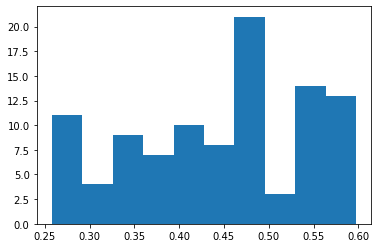

In [5]:
plt.hist(potentail_arr)

In [6]:
# plt.imshow(spiking_records)

# Measuring E
we can measure if the total network is synchronized. let's define E as following:

$$
\ddot{E}+ 2\alpha \dot{E}+\alpha^{2}E =2\alpha N \sum_{n|tـn<t} \delta(t - t_n - t_d)
$$

To do so, we define $M$ as $M = \dot{E} + \alpha E$. As a result we wil have the following systems of equation:
\begin{equation}
    \begin{cases}
      \dot{E} = M - \alpha E\\
      \dot{M} = -  \alpha M + 2 \alpha N \sum_{n|tـn<t} \delta(t - t_n - t_d)
    \end{cases}\,.
\end{equation}


In [7]:
alpha = 20
m_arr = np.zeros(total_steps)
e_arr = np.zeros(total_steps)

In [8]:
for i in tqdm(range(0,total_steps-1)):
    m_arr[i+1] = m_arr[i] + time_step*( -alpha*m_arr[i] + 2*alpha*num_neurons*np.sum(spiking_records[i]) )
    e_arr[i+1] = e_arr[i] + time_step*( m_arr[i] - alpha*e_arr[i] )

100%|████████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 100167.57it/s]


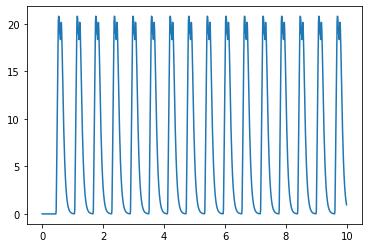

In [9]:
plt.plot(time_span,e_arr)

In [10]:
sigma = np.var( e_arr )
sigma

61.73031945819802

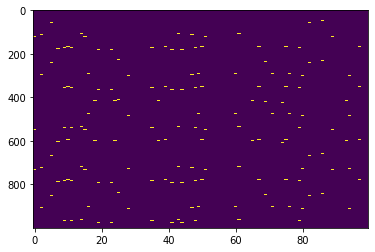

In [13]:
plt.imshow(spiking_records,aspect= 'auto')